In [1]:
from astropy.io import fits
from astropy import units, constants
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import corner
from voigt_fit_lib import *
import os
import pickle

Load in the files

In [2]:
rootdir = '/Users/thepoetoftwilight/Documents/CUBS/Data/PG1522+101/'

First, the FUV files

In [3]:
spec_fits_fuv = fits.open(rootdir + 'FUV/PG1522+101_FUV_wavecal_new.fits')
lsf_fits_fuv = fits.open(rootdir + 'FUV/PG1522_COS_FUV_wavcal2022_lsf_ZQ.fits')

Then, the NUV files

In [4]:
spec_fits_nuv = fits.open(rootdir + 'G185M/PG1522+101_NUV_wavecal_new.fits')
lsf_fits_nuv = fits.open(rootdir + 'G185M/PG1522_COS_NUV_wavcal2022_lsf.fits')

Then, the STIS files

In [5]:
spec_fits_stis = fits.open(rootdir + 'STIS/PG1522+101_E230M_new.fits')
lsf_fits_stis = fits.open(rootdir + 'STIS/PG1522_STIS_NUV_wavcal2022_lsf.fits')

Then, the HIRES files

In [6]:
spec_fits_hires = fits.open(rootdir + 'HIRES/PG1522+101_HIRES.fits')
lsf_fits_hires = fits.open(rootdir + 'HIRES/PG1522_HIRES_wavcal2023_lsf.fits')

Compile a list of the spectra, continuum nodes, and IDs for all detectors

In [7]:
spec_fits_list = [spec_fits_fuv, spec_fits_nuv, spec_fits_stis, spec_fits_hires]
lsf_fits_list = [lsf_fits_fuv, lsf_fits_nuv, lsf_fits_stis, lsf_fits_hires]

Systemic redshift

In [8]:
z_sys = 0.2915 #0.72882616 #0.72882414 

In [9]:
#np.round(0.72882616 - ((1+0.72882616)*0.12/3e+5), 8)

# CIV

## CIV 1548

In [13]:
civ_1548_nuv = ion_transition('CIV', 1548, 'C', z_sys, 'NUV')

In [14]:
civ_1548_nuv.grab_ion_transition_info()

In [25]:
civ_1548_nuv.grab_ion_transition_spec(spec_fits_list, masks=[[-300,-170],[160,300]])

In [26]:
civ_1548_nuv.cont_norm_flux(v_abs_range=[-50,50], degree=1)

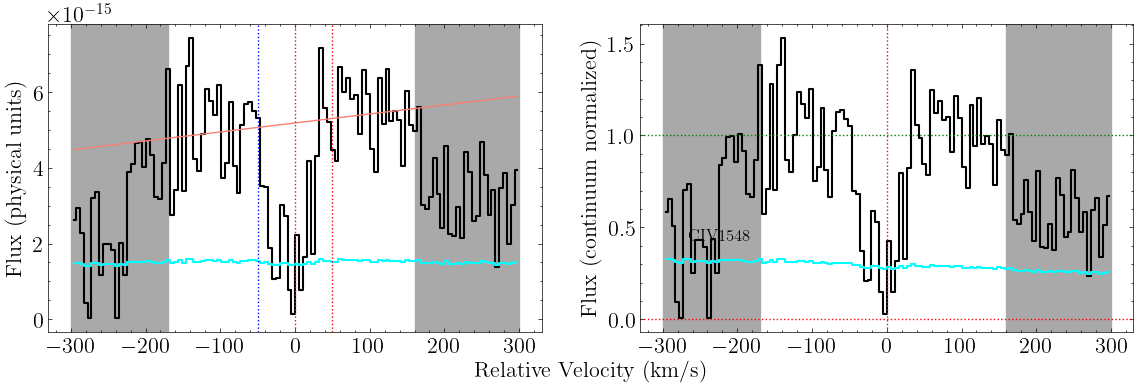

In [27]:
fig, ax = civ_1548_nuv.plot_ion_transition_spec_cont()

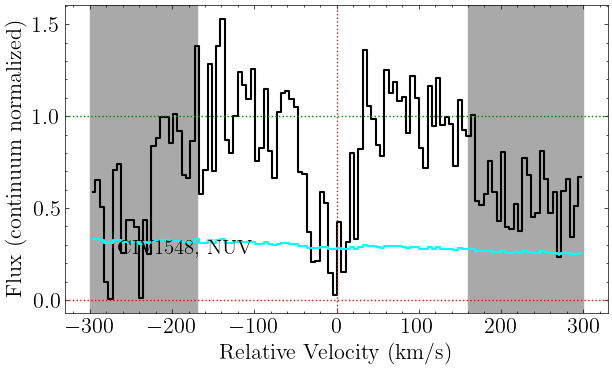

In [28]:
fig, ax = civ_1548_nuv.plot_ion_transition_spec()

In [29]:
#civ_1548_nuv.get_EW_total(-50,50)

In [30]:
civ_1548_nuv.grab_ion_transition_lsf(lsf_fits_list)

In [31]:
civ_1548_nuv.init_ion_transition(init_values = np.array([[14.5, 17, 0]]), 
                             lsf_convolve = True)

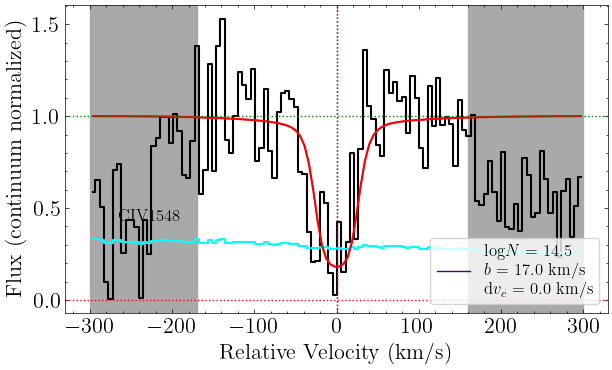

In [32]:
fig, ax = civ_1548_nuv.plot_ion_transition_init_fit()

In [33]:
civ_1548_nuv.fit_ion_transition()

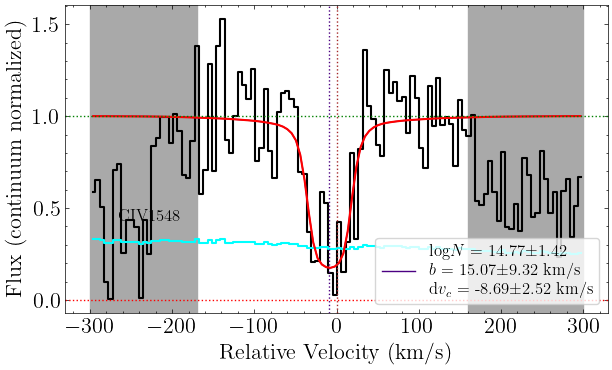

In [34]:
fig, ax = civ_1548_nuv.plot_ion_transition_best_fit()

## CIV 1550

In [35]:
civ_1550_nuv = ion_transition('CIV', 1550, 'C', z_sys, 'NUV')

In [28]:
civ_1550_nuv.grab_ion_transition_info()

In [46]:
civ_1550_nuv.grab_ion_transition_spec(spec_fits_list, masks=[[-300,-50]])

In [47]:
civ_1550_nuv.cont_norm_flux(v_abs_range=[-140,50], degree=1)

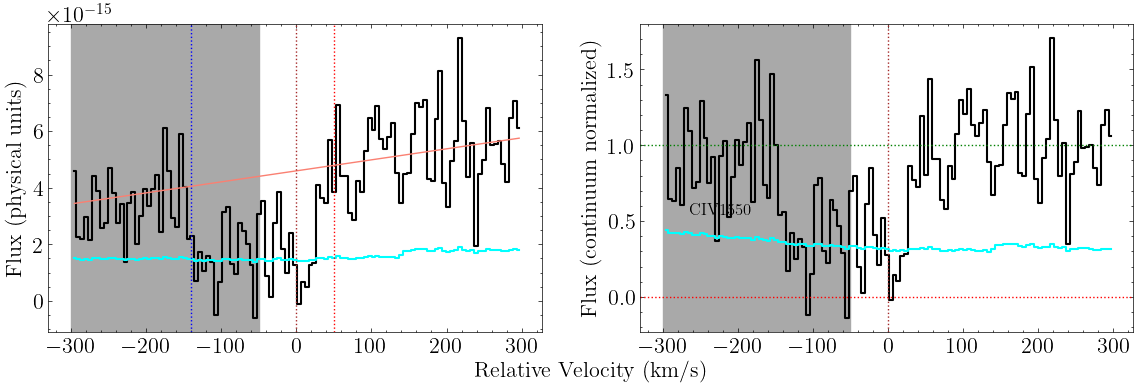

In [48]:
fig, ax = civ_1550_nuv.plot_ion_transition_spec_cont()

In [49]:
civ_1550_nuv.grab_ion_transition_lsf(lsf_fits_list)

In [50]:
civ_1550_nuv.init_ion_transition(init_values = np.array([[15.0, 14, -9]]), 
                             lsf_convolve = True)

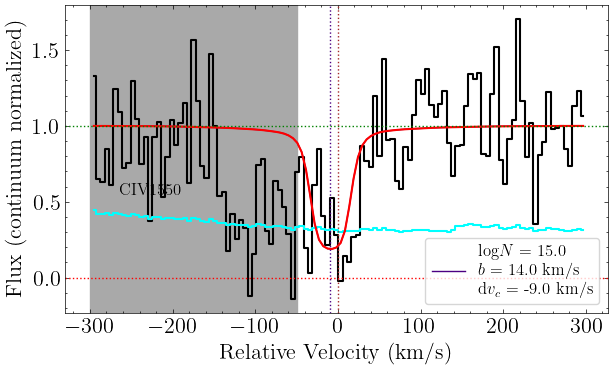

In [51]:
fig, ax = civ_1550_nuv.plot_ion_transition_init_fit()

In [52]:
civ_1550_nuv.fit_ion_transition()

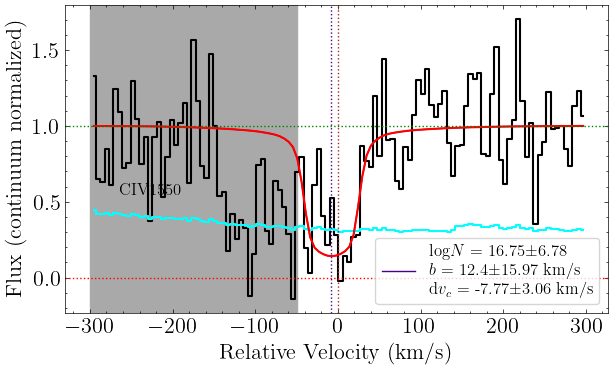

In [53]:
fig, ax = civ_1550_nuv.plot_ion_transition_best_fit()

## CIV ion

In [54]:
civ = ion(z_sys, 'CIV', [civ_1548_nuv, civ_1550_nuv])

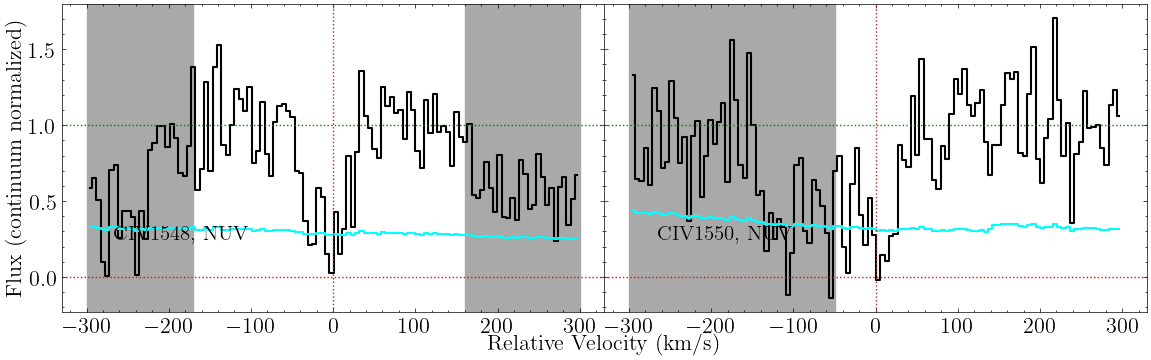

In [55]:
fig, axes = civ.plot_ion()

In [56]:
civ.init_ion([[[14.5, 14, -10]],
              [[14.5, 14, -10]]])

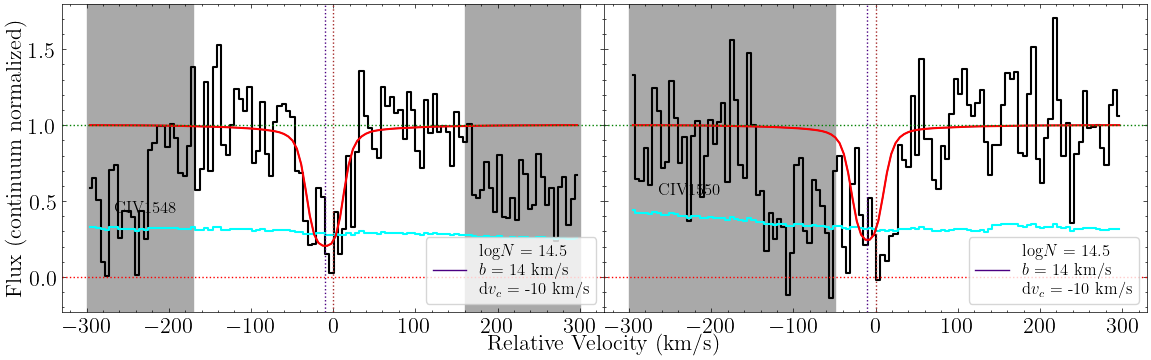

In [57]:
fig, axes = civ.plot_ion_init_fit()

In [58]:
civ.fit_ion(tie_params_list = [['it1c1_logN', 'it2c1_logN'],
                               ['it1c1_b', 'it2c1_b'],
                               ['it1c1_dv_c', 'it2c1_dv_c'],
                              ])

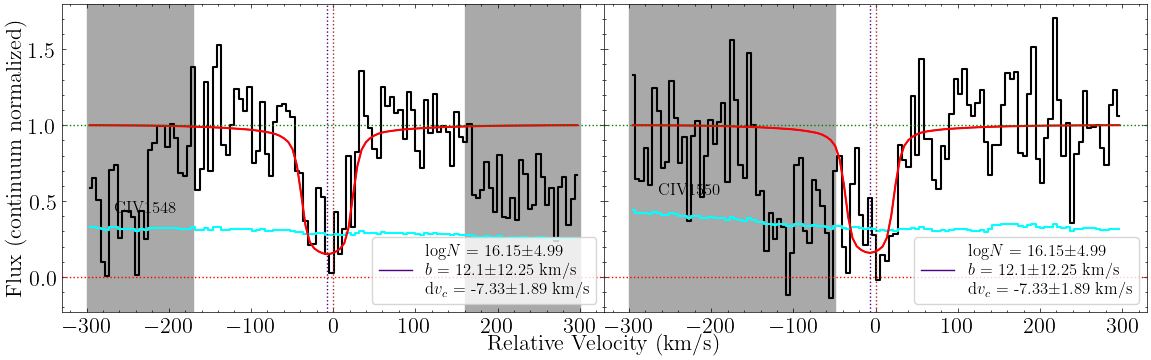

In [59]:
fig, axes = civ.plot_ion_best_fit()

In [107]:
#civ.fit_ion_emcee(loaddir=rootdir, scale_covar=1e-7, n_walkers=100, n_steps=2500)
civ.fit_ion_emcee(load=True, loaddir=rootdir)

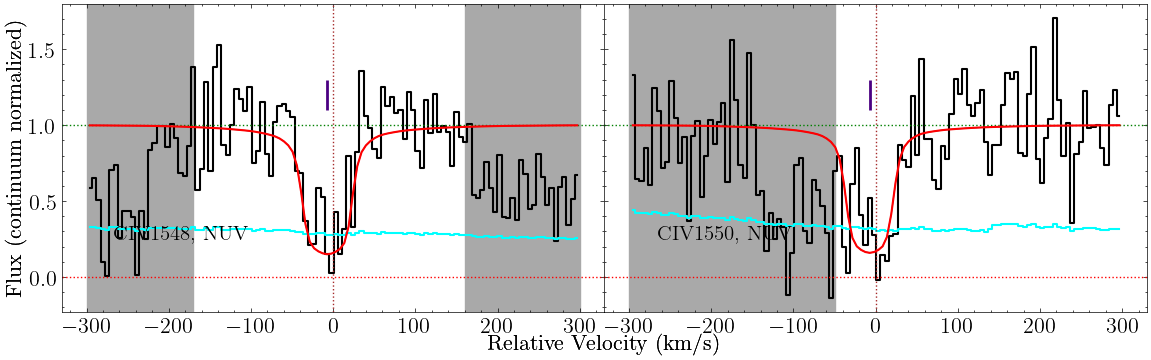

In [108]:
fig, axes = civ.plot_samples()

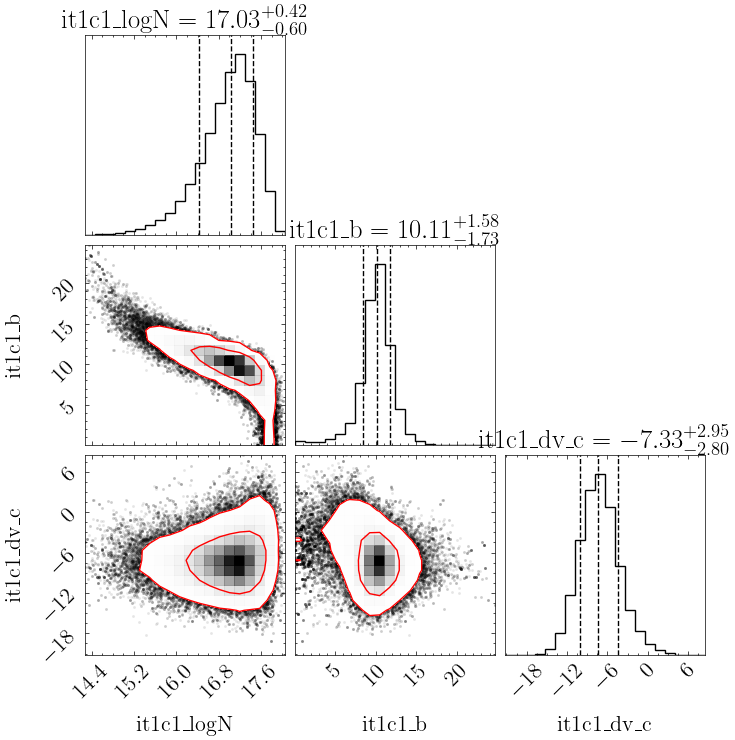

In [109]:
civ.plot_corner()

# CIII

## CIII 977

In [79]:
ciii_977_fuv = ion_transition('CIII', 977, 'C', z_sys, 'FUV')

In [80]:
ciii_977_fuv.grab_ion_transition_info()

In [81]:
ciii_977_fuv.grab_ion_transition_spec(spec_fits_list, masks=[[-300,-200],[10,150]])

In [82]:
ciii_977_fuv.cont_norm_flux(v_abs_range=[-50,50], degree=1)

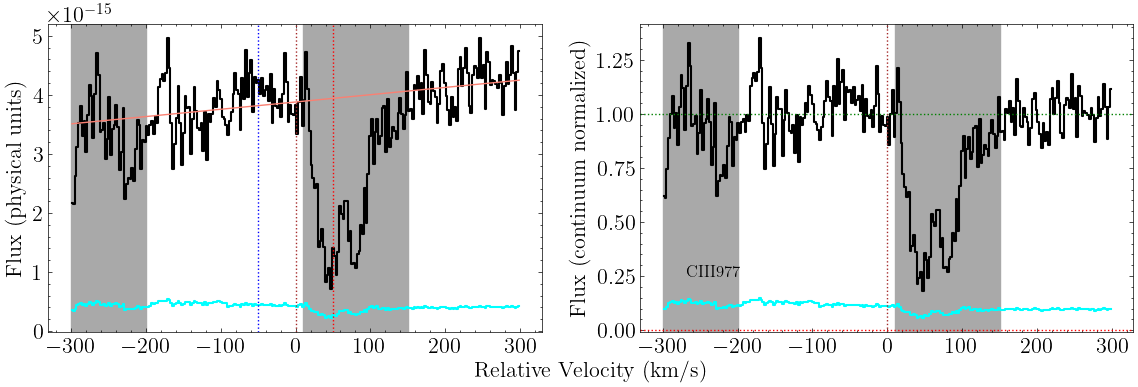

In [83]:
fig, ax = ciii_977_fuv.plot_ion_transition_spec_cont()

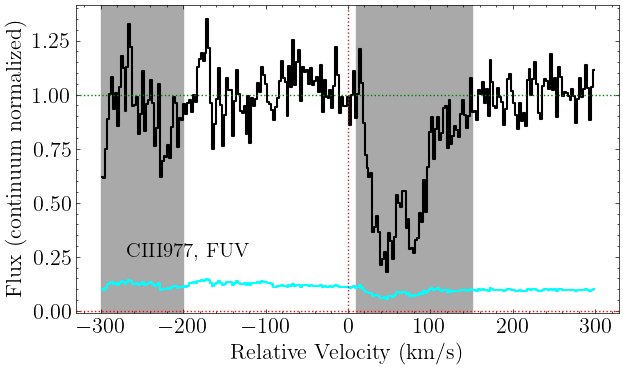

In [164]:
fig, ax = ciii_977_fuv.plot_ion_transition_spec()

# HI

## HI 1215

In [90]:
hi_1215_fuv = ion_transition('HI', 1215, 'H', z_sys, 'FUV')

In [91]:
hi_1215_fuv.grab_ion_transition_info()

In [92]:
hi_1215_fuv.grab_ion_transition_spec(spec_fits_list, masks=[[-300,-170],[160,300]])

In [93]:
hi_1215_fuv.cont_norm_flux(v_abs_range=[-50,50], degree=1)

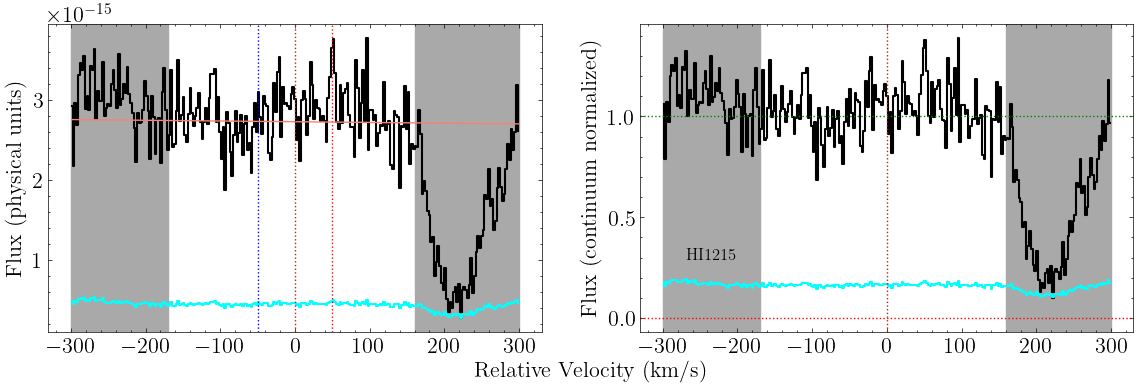

In [94]:
fig, ax = hi_1215_fuv.plot_ion_transition_spec_cont()

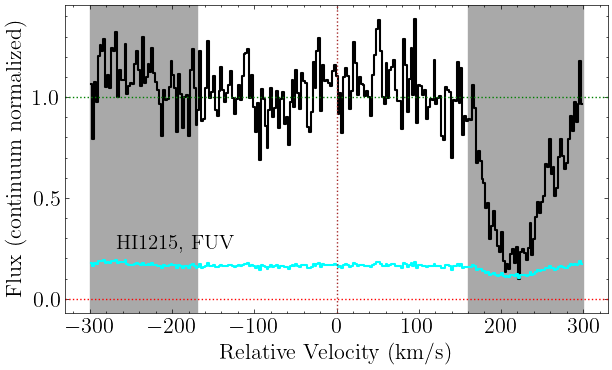

In [165]:
fig, ax = hi_1215_fuv.plot_ion_transition_spec()

# OVI

## OVI 1031

In [147]:
ovi_1031_fuv = ion_transition('OVI', 1031, 'O', z_sys, 'FUV')

In [148]:
ovi_1031_fuv.grab_ion_transition_info()

In [149]:
ovi_1031_fuv.grab_ion_transition_spec(spec_fits_list, masks=[[-300,-150],[30,150],[250,300]])

In [150]:
ovi_1031_fuv.cont_norm_flux(v_abs_range=[-50,50], degree=1)

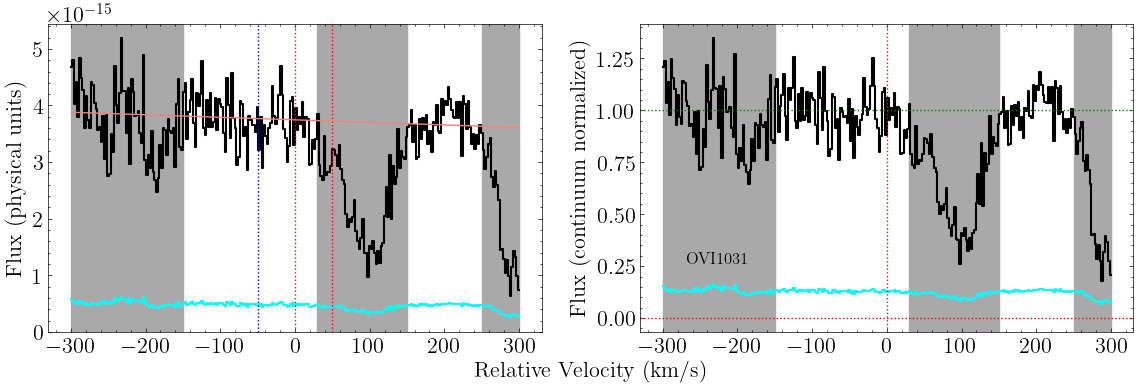

In [151]:
fig, ax = ovi_1031_fuv.plot_ion_transition_spec_cont()

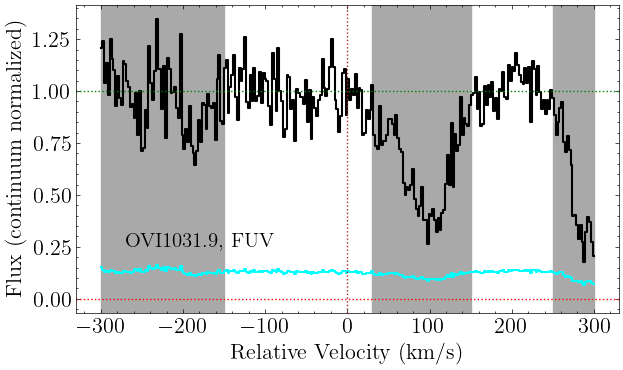

In [232]:
fig, ax = ovi_1031_fuv.plot_ion_transition_spec()

## OVI 1037

In [152]:
ovi_1037_fuv = ion_transition('OVI', 1037, 'O', z_sys, 'FUV')

In [157]:
ovi_1037_fuv.grab_ion_transition_info()

In [161]:
ovi_1037_fuv.grab_ion_transition_spec(spec_fits_list, masks=[[120,300]])

In [162]:
ovi_1037_fuv.cont_norm_flux(v_abs_range=[-50,50], degree=1)

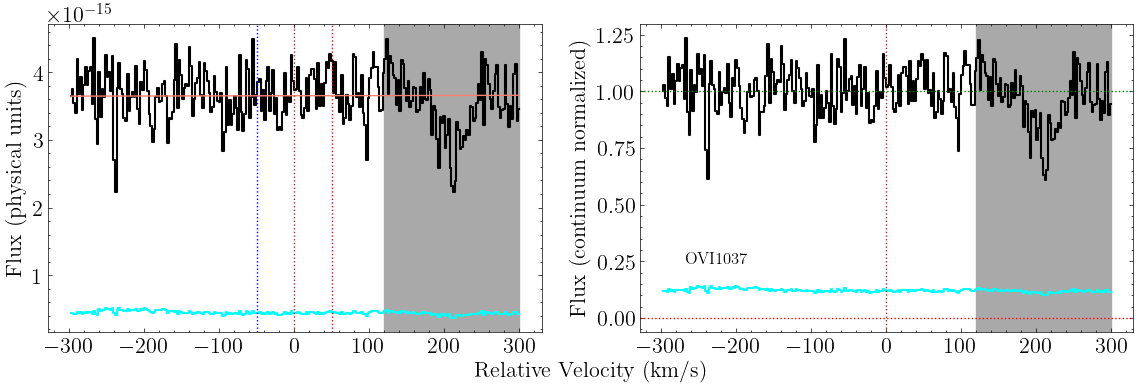

In [163]:
fig, ax = ovi_1037_fuv.plot_ion_transition_spec_cont()

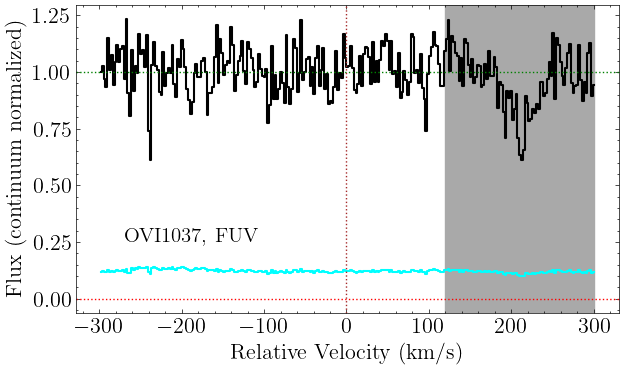

In [233]:
fig, ax = ovi_1037_fuv.plot_ion_transition_spec()

# NV

## NV 1238

In [211]:
nv_1238_fuv = ion_transition('NV', 1238, 'N', z_sys, 'FUV')

In [212]:
nv_1238_fuv.grab_ion_transition_info()

In [213]:
nv_1238_fuv.grab_ion_transition_spec(spec_fits_list, masks=[[180,300]])

In [214]:
nv_1238_fuv.cont_norm_flux(v_abs_range=[-80,80], degree=1)

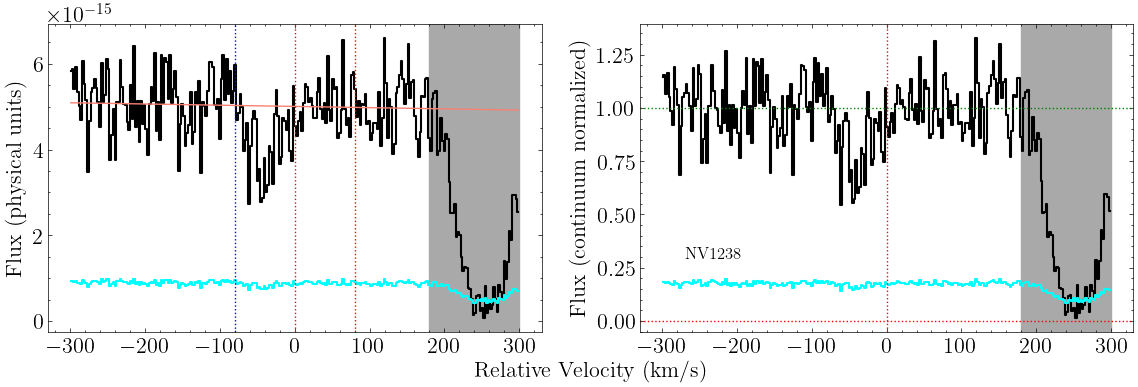

In [215]:
fig, ax = nv_1238_fuv.plot_ion_transition_spec_cont()

In [216]:
nv_1238_fuv.grab_ion_transition_lsf(lsf_fits_list)

In [220]:
nv_1238_fuv.init_ion_transition(init_values = np.array([[14.0, 12, -30]]), 
                             lsf_convolve = True)

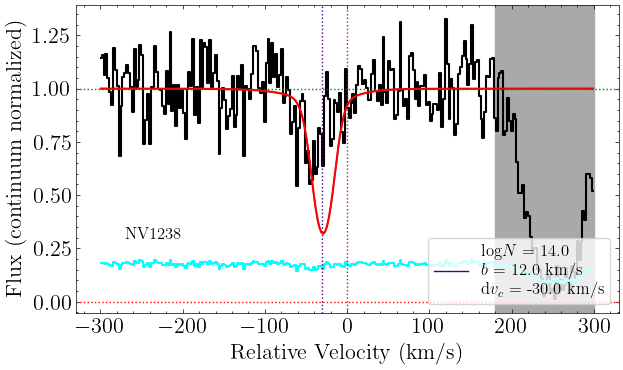

In [221]:
fig, ax = nv_1238_fuv.plot_ion_transition_init_fit()

In [222]:
nv_1238_fuv.fit_ion_transition()

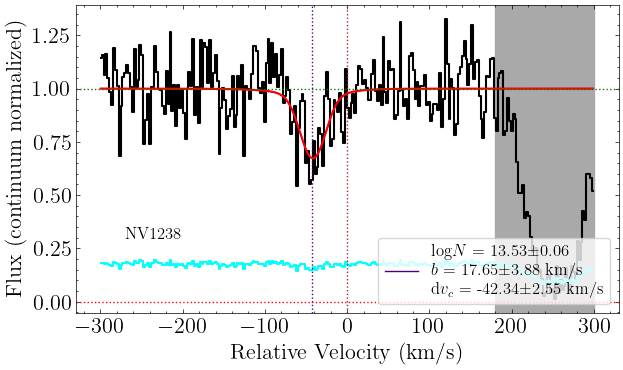

In [223]:
fig, ax = nv_1238_fuv.plot_ion_transition_best_fit()

## NV 1242

In [224]:
nv_1242_fuv = ion_transition('NV', 1242, 'N', z_sys, 'FUV')

In [225]:
nv_1242_fuv.grab_ion_transition_info()

In [226]:
nv_1242_fuv.grab_ion_transition_spec(spec_fits_list, masks=[[-270,-70]])

In [227]:
nv_1242_fuv.cont_norm_flux(v_abs_range=[-50,80], degree=1)

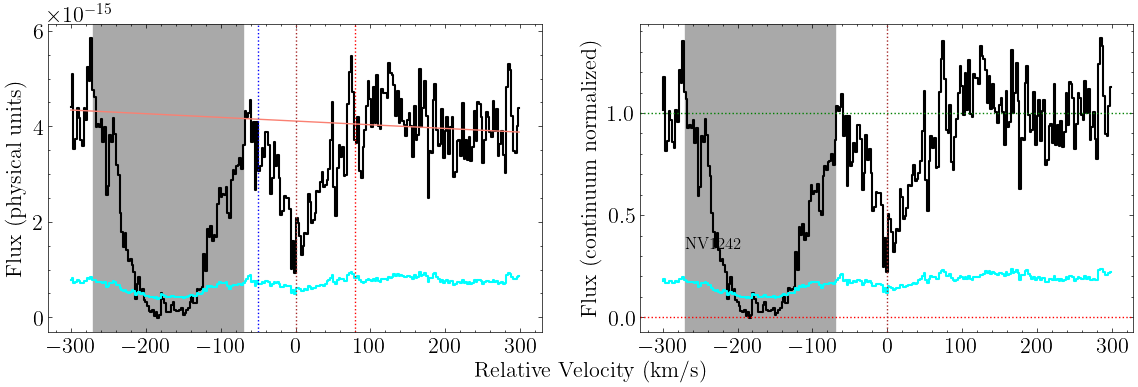

In [228]:
fig, ax = nv_1242_fuv.plot_ion_transition_spec_cont()

In [229]:
nv_1242_fuv.grab_ion_transition_lsf(lsf_fits_list)

In [230]:
nv_1242_fuv.init_ion_transition(init_values = np.array([[13.5, 17, -42]]), 
                             lsf_convolve = True)

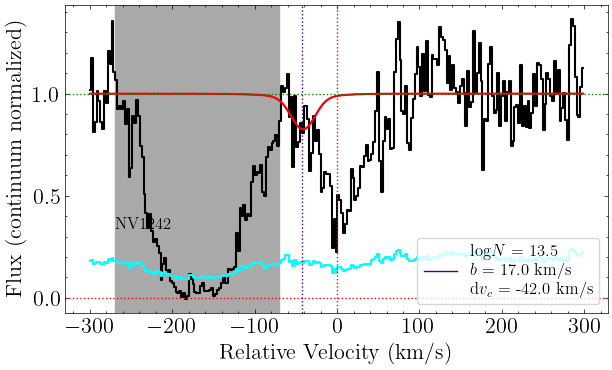

In [231]:
fig, ax = nv_1242_fuv.plot_ion_transition_init_fit()

In [191]:
nv_1242_fuv.fit_ion_transition()

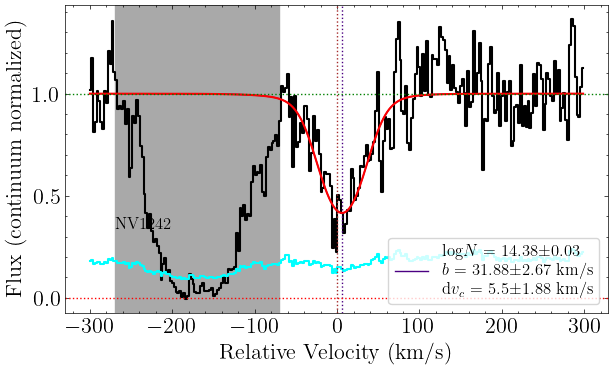

In [192]:
fig, ax = nv_1242_fuv.plot_ion_transition_best_fit()